# **Real-Time Communication System Powered By AI For Specially Abled**

**Loading the Dataset & Image Data Generation**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)


In [3]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)


Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [4]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [5]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**Model Creation**

In [6]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [7]:
# Creating Model
model=Sequential()

In [8]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
# Adding Dense Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [12]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
18/18 [==============================] - 97s 5s/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.3700 - val_accuracy: 0.9756
Epoch 2/10
18/18 [==============================] - 97s 5s/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 0.3347 - val_accuracy: 0.9751
Epoch 3/10
18/18 [==============================] - 95s 5s/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.3324 - val_accuracy: 0.9756
Epoch 4/10
18/18 [==============================] - 94s 5s/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.3712 - val_accuracy: 0.9747
Epoch 5/10
18/18 [==============================] - 95s 5s/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.3011 - val_accuracy: 0.9764
Epoch 6/10
18/18 [==============================] - 95s 5s/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.2759 - val_accuracy: 0.9769
Epoch 7/10
18/18 [==============================] - 94s 5s/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.3056 - val_accuracy: 0.9769
Epoch 8/10
18/18 [==

**Saving the Model**

In [13]:
model.save('asl_model_84_54.h5')

**Testing the model**

In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [15]:
model=load_model('asl_model_84_54.h5')
img=image.load_img(r'Dataset/test_set/D/2.png',
                   target_size=(64,64))

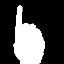

In [16]:
img

In [17]:
x=image.img_to_array(img)

In [18]:
x.ndim

3

In [19]:
x=np.expand_dims(x,axis=0)

In [20]:
x.ndim

4

In [21]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 119ms/step


In [22]:
pred

array([4], dtype=int64)

In [23]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

E


**OPEN CV**

In [24]:
import cv2

In [25]:
img=cv2.imread(r'Dataset/test_set/C/2.png',1)

In [26]:
img1=cv2.imread(r'Dataset/test_set/B/2.png',0)

In [27]:
print(img.shape)

(64, 64, 3)


In [28]:
from google.colab.patches import cv2
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'google.colab'

## CNN VIDEO ANALYSIS

In [29]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('asl_model_84_54.h5')
video=cv2.VideoCapture(0)
index=['A','B','C','D','E','F','G','H','I']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620,400), (255,0,0), 5)
    cv2.putText(frame,'The Predicted Alphabet is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows() 

1/1 [==============================] - 0s 18ms/step
